# Simulation du modèle de Ségrégation de Schelling


 Dans ce modèle, Nous allons créer deux populations (bleu et rouge) au préalable placées au hasard sur le graphique
 et au fur et à mesure nos populations vont se rapprocher des habitants similaires
 à leur couleur et forme. 
 <br>
 Cela va ainsi créer ce que l'on appelle une ségrégation, c'est lorsque un processus de mise à
 l'écart se créer, ici, la résultante est la séparation de ces deux groupes créant un graphique avec des
 minis territoires hétérogènes (soit des amas de points bleus et points rouges sans aucun mélange).


In [134]:
# Importation des librairies.

import random # Permet de générer des nombres au hazard.
from matplotlib import pyplot as plt # Permet de tracer Les graphiques.

In [135]:

# Création de la classe qui applique la Théorie de Thomas Schelling.
class Schelling_Model:

    # Initialisation de La classe : 
    def __init__(self, gender):
        self.gender = gender # Un seul argument pour définir un genre pour chacuns des deux catégories d'habitants.
        self.get_position() # Permet de rappeler la fonction.
        
    # Génère la localisation des points (entre 0 et 1 en abscisse et en ordonné).
    def get_position(self):
        self.x_axis = random.random() # Permet de générer l'absisse.
        self.y_axis = random.random() # Permet de générer l'ordonnée.

    # Permet de calculer la distance de chaque point avec la distance de Manhattan.
    def get_manhattan_distance(self, other): 
        # self représente ma liste initiale, population_1
        # other représente les éléments que j'ai rajouté à ma liste initiale, population_2
        
        distance_x = abs(self.x_axis - other.x_axis) # Calcul des distances pour les absisses.
        distance_y = abs(self.y_axis - other.y_axis) # Calcul des distances pour les ordonnées.
        return (distance_x + distance_y) # Retourne l'addition des distances des absisses et ordonnées

    # Vérification qui permet de savoir si un nombre suffisant de voisins SIMILAIRES sont proches.
    def to_be_satisfied(self, residents):
        
        mandistances_resident = list() # Liste dans laquelle nous allons rajouter la distance et notre habitant.
        
        # Boucle for pour itérer sur chacun des habitants de la liste de la population.
        for resident in residents:
            if self != resident: # self représente ici les habitants du premier genre (population_1)
                manhattan_distance = self.get_manhattan_distance(resident)
                mandistances_resident.append((manhattan_distance, resident))
                
        # Permet de trier la liste par ordre croissant.
        mandistances_resident.sort()
        # Permet d'extraire les voisins les plus proches.
        neighbours = [resident for d, resident in mandistances_resident[:num_neighbors]]
        # Permet de compter le nombre de voisin qui est du même genre.
        same_gender = sum(self.gender == resident.gender for resident in neighbours)
        return same_gender >= minimum_gender
    
    # Explicitement, si l'habitant n'est pas satisfait de son emplacement en fonction de ses voisins
    # alors il choissit un nouveau lieu au hasard jusqu'à ce qu'il soit satisfait.
    def relocation(self, residents):
        while not self.to_be_satisfied(residents):
            self.get_position()




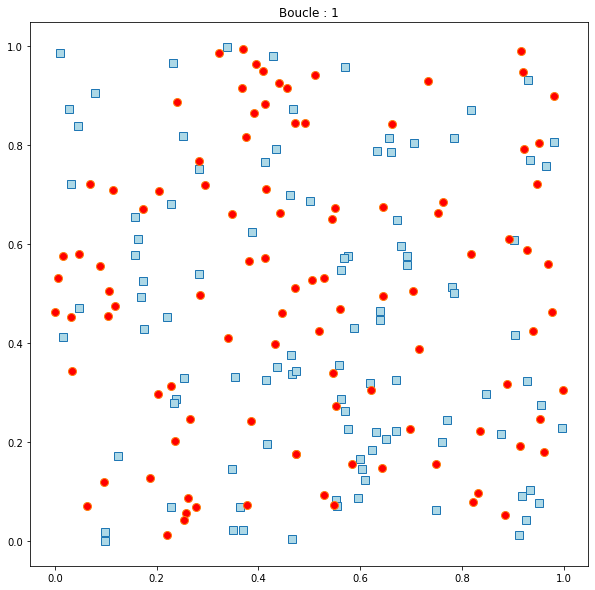

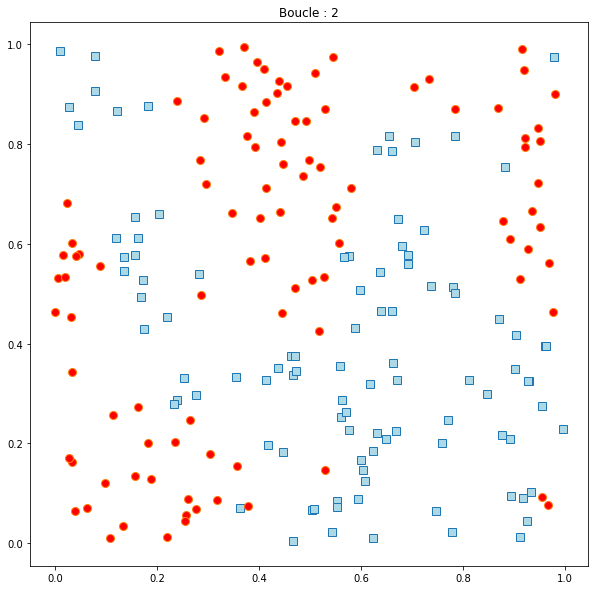

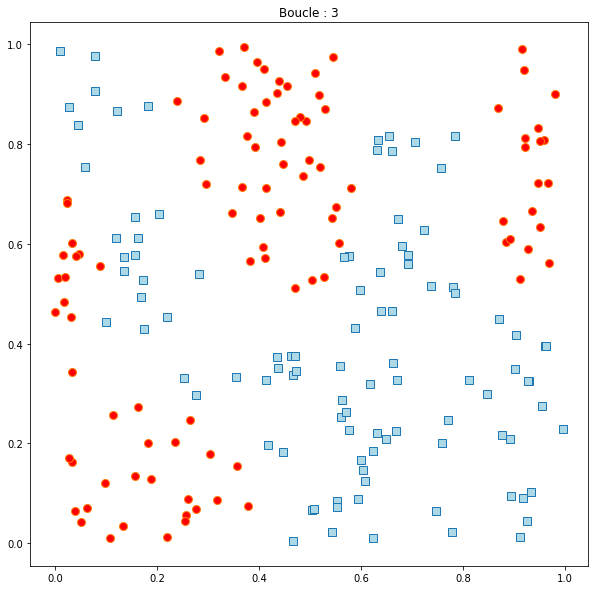

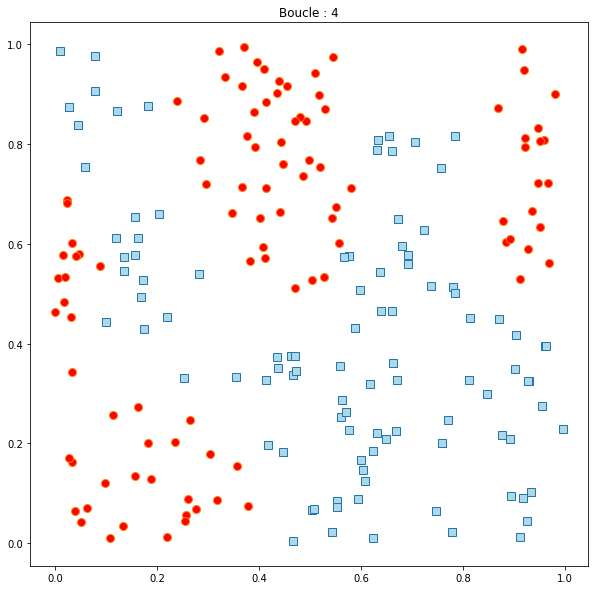

Après application du modèle de Schelling sur notre population, nous pouvons observer une ségrégation totale
dans le graphique N°4 !




In [140]:
population_1, population_2 = 100, 100 # Quantités des population 1 et population 2.
num_neighbors = 10 # Nombre d'habitant considérés comme voisins.
minimum_gender = 5 # Vouloir qu'au moins autant de voisins soient du même type.

# Création de la liste de populations (population_1) grâce à une liste de compréhension.
residents = [Schelling_Model('blue') for _ in range(0, population_1)]

# Utilisation de .extend pour rajouter à la liste la deuxième population (population_2).
# .extend est différent de .append car elle permet d'extraire les éléments d'une liste pour les ajouter
# directement à l'intérieur d'une autre liste. Tandis que append aurait créer une liste de liste.

residents.extend(Schelling_Model('red') for _ in range(0, population_2))

# Permet de tracer un diagramme avec les agents.
def to_plot(residents, loop):
    x_values_0 = [] # Absisse de la population_1.
    y_values_0 = [] # Ordonnée de la population_1.
    
    x_values_1 = [] # Absisse de la population_2.
    y_values_1 = [] # Ordonnée de la population_2.
    
    # Boucle for pour itérer sur chacun des habitants de la liste de la population.
    for resident in residents:
        if resident.gender == 'blue': # Explicitement, Si le genre de l'habitant est bleu alors :
            x_values_0.append(resident.x_axis) # Regroupement de toutes les absisses
            y_values_0.append(resident.y_axis) # Regroupement de toutes les ordonnées
            
        else: # Sinon : (pour l'autre genre d'habitant)
            x_values_1.append(resident.x_axis)
            y_values_1.append(resident.y_axis)
    
    # Création des graphiques :
    print('\n')
    figure = plt.figure(figsize=(10, 10))
    plt.plot(x_values_0, y_values_0, 's', markerfacecolor = 'lightblue', markersize = 8)
    plt.plot(x_values_1, y_values_1, 'o', markerfacecolor = 'red', markersize = 8)
    plt.title('Boucle : {}'.format(loop))
    plt.show()


# Boucle while, elle continue jusqu'à ce qu'il n'y est plus de déplacement des habitants bleus :
count = 1
while True:
    # Permet de rappeler la fonction qui créer les graphiques
    to_plot(residents, count)
    count += 1
    no_relocation = True
    
    # Boucle for pour itérer sur chacun des habitants de la liste de la population.
    for resident in residents:
        last_position = resident.x_axis, resident.y_axis
        resident.relocation(residents)
        if resident.x_axis != last_position[0] and resident.y_axis != last_position[1]:
            no_relocation = False
            
    if no_relocation:
        print(f'Après application du modèle de Schelling sur notre population, nous pouvons observer une ségrégation totale\ndans le graphique N°{count - 1} !')
        print('\n')
        break
        